In [159]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

In [160]:
class Paper:
    def __init__(self):
        self.outlinks = []
        self.inlinks = []
        self.abstract = ""
        self.keywords = []
        self.page_rank = 1
        self.n_citations = None
        self.authors = []
#         self.authors_org = []
        self.journal = None
        self.year = None
        self.title = None

In [3]:
dict = {}

In [4]:
def init_dict(df, graph):
    for index, row in df.iterrows():
        id = row["id"]
        if id not in graph.keys():
            graph[id] = Paper()
            graph[id].outlinks = [] if not isinstance(row["references"], list) else row["references"]
            graph[id].abstract = "" if(row["abstract"]==None) else row["abstract"]
            graph[id].keywords = [] if not isinstance(row["keywords"], list) else row["keywords"]
            graph[id].n_citations = row["n_citation"]
    #         authors = json.loads(row["authors"])
    #         print(row["authors"])
            if isinstance(row["authors"], list):
                for author in row["authors"]:
                    org = ""
                    name = ""
                    if "org" in author.keys():
                        org = author["org"]
                    if "name" in author.keys():
                        name = author["name"]

                    graph[id].authors.append((name, org))

            graph[id].journal = "" if(row["venue"]==None) else row["venue"]
            graph[id].year =  1700 if(row["year"]==None) else row["year"]
            graph[id].title = "" if(row["title"]==None) else row["title"]
        
def fill_dict(graph):
    length = len(graph.keys())
    for id in graph.keys():
        graph[id].page_rank = 1/length
        refs = graph[id].outlinks
#         print(refs)
        for ref in refs:
            if ref in graph.keys():
                graph[ref].inlinks.append(id)

In [127]:
def reset_page_rank(graph):
    length = len(graph.keys())
    for id in graph.keys():
        graph[id].page_rank = 1/length

In [6]:
with open('./aminer_papers_0/aminer_papers_0.txt') as file:
    status = []
    for line in file:
        
        status.append(json.loads(line))
        
df = pd.DataFrame(status)
df.head()

,abstract,authors,doi,id,isbn,issn,issue,keywords,lang,n_citation,page_end,page_start,pdf,references,title,url,venue,volume,year
0,NaN,"[{'name': 'G. Adam'}, {'name': 'K. Schreiber'}]",10.1002/ange.19650770204,53e99784b7602d9701f3e130,NaN,NaN,2,NaN,en,NaN,95,94,NaN,"[53e9a6e6b7602d970301a47d, 53e9b4dfb7602d97040...",1.4-N→N′-Acylwanderung bei einem Diaminosteroid,[http://dx.doi.org/10.1002/ange.19650770204],Angewandte Chemie,77,1965.0
1,NaN,"[{'name': 'R. Farahbod'}, {'name': 'V. Gervasi...",NaN,53e99784b7602d9701f3e131,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,"[53e9a1d0b7602d9702ac8f1b, 53e9ad1fb7602d97036...",Design and Specification of the CoreASM Execut...,NaN,NaN,NaN,NaN
2,The method to making technology roadmap is int...,"[{'name': 'MO Chou'}, {'name': 'CHEN Jiqing'},...",NaN,53e99784b7602d9701f3e132,NaN,NaN,19,"[science and technology production, technology...",zh,NaN,95,90,NaN,NaN,Practice Research on Technology Roadmap for El...,NaN,Science and Technology Management Research,NaN,2013.0
3,Drought is the first place in all the natural ...,"[{'name': 'Peijuan Wang'}, {'name': 'Jiahua Zh...",10.1109/IGARSS.2011.6049503,53e99784b7602d9701f3e133,NaN,NaN,null,"[canopy parameters, canopy spectrum, different...",en,NaN,1933,1930,NaN,"[53e999c3b7602d970220b9b7, 53e9b1d6b7602d9703c...",The relationship between canopy parameters and...,[http://dx.doi.org/10.1109/IGARSS.2011.6049503],IGARSS,null,2011.0
4,Determination of total sugar can serve to moni...,"[{'name': 'LI Li-li', 'org': 'Yantai Institute...",NaN,53e99784b7602d9701f3e135,NaN,NaN,07,"[metabolites, Jerusalem artichoke, total sugar...",zh,1.0,93+97,90,NaN,NaN,The effect of metabolites on the determination...,NaN,Food Science and Technology,NaN,2012.0


In [7]:
clean_df = df.drop(['pdf','url', 'volume', 'doi', 'isbn', 'issn','page_end','page_start', 'issue'],axis=1)
clean_df.dropna(subset=['n_citation'], inplace=True)
# clean_df['references'] = clean_df['references'].apply(lambda d: d if isinstance(d, list) else [])
# sns.heatmap(clean_df.isnull(), cbar=False)
clean_df.head()

,abstract,authors,id,keywords,lang,n_citation,references,title,venue,year
4,Determination of total sugar can serve to moni...,"[{'name': 'LI Li-li', 'org': 'Yantai Institute...",53e99784b7602d9701f3e135,"[metabolites, Jerusalem artichoke, total sugar...",zh,1.0,NaN,The effect of metabolites on the determination...,Food Science and Technology,2012.0
7,This paper discussed the planning and design m...,"[{'name': 'LIU Yu-qiong', 'org': 'School of Re...",53e99784b7602d9701f3e139,"[Planning and design method, Mountainous regio...",zh,1.0,NaN,Planning and Design Method of Land Consolidati...,Journal of Anhui Agricultural Sciences,2012.0
8,Rough set is a mathematical tool to deal with ...,NaN,53e99784b7602d9701f3e13a,"[Data Mining, Rough Set, Algorithm, Rules Extr...",zh,3.0,NaN,A Data Mining Based on Rough Set Theory,Software Guide,2012.0
11,"We consider the problem of determining it(Qd),...",[{'name': 'David Galvin'}],53e99784b7602d9701f3e13d,NaN,en,1.0,"[53e9aa61b7602d97033d1644, 53e9adb1b7602d97037...",Independent sets of a xed size in the discrete...,NaN,NaN
14,The carbon fiber used PAN as precursor is wide...,"[{'name': 'JIN Li-guo', 'org': 'China Syntheti...",53e99784b7602d9701f3e140,"[production technology, carbon fiber, present ...",zh,18.0,NaN,Present Situation of China Carbon Fiber Indust...,Synthetic Fiber in China,2009.0


In [8]:
init_dict(clean_df)

In [9]:
len(dict)

262138

In [10]:
clean_df["id"].nunique()

262138

In [11]:
fill_dict()

In [12]:
for id in list(dict.keys())[:10]:
    print(dict[id].inlinks)
    print(dict[id].outlinks)
    print(dict[id].page_rank)

[]
[]
3.814784579114817e-06
[]
[]
3.814784579114817e-06
[]
[]
3.814784579114817e-06
[]
['53e9aa61b7602d97033d1644', '53e9adb1b7602d97037b3f34', '53e99d81b7602d970263de6d', '53e9ae1cb7602d970382ae0f', '53e9b41bb7602d9703f14fae']
3.814784579114817e-06
[]
[]
3.814784579114817e-06
[]
[]
3.814784579114817e-06
[]
[]
3.814784579114817e-06
[]
[]
3.814784579114817e-06
['53e9980eb7602d9702023840']
['53e99fb5b7602d9702890e18', '53e9b8a8b7602d97044831bd', '53e997f4b7602d9701ff5c74', '56d83342dabfae2eee2fde9b', '53e99fd7b7602d97028b6477', '53e9acc4b7602d97036a52a9', '53e99b0ab7602d970239c824', '53e9a26bb7602d9702b73450', '56d83346dabfae2eee2ff0ad', '56d83351dabfae2eee302fca', '55a447622401c6de3b8c92c0', '53e9b091b7602d9703af78ae', '53e9aa32b7602d970339d7cb', '53e9a6cab7602d9702ffd116', '53e9ad18b7602d97036fbc02', '53e9ab20b7602d97034a4f94', '53e9ae11b7602d97038219ca', '53e9af5ab7602d970399a87f', '53e99c44b7602d97024f6287', '53e9ae8ab7602d97038ad76c', '53e9ab55b7602d97034edf32', '53e9aea4b7602d97038

In [13]:
reset_page_rank()

In [128]:
# refer here  : http://dpk.io/pagerank
def page_rank(maxiters, epsilon, damping, graph):
    for i in range(maxiters):
        print(i)
        old_ranks = {}
        for id in graph.keys():
            old_ranks[id] = graph[id].page_rank
            page_rank = (1-damping)/len(graph.keys())
            citations = graph[id].inlinks
            for cite_id in citations:
                page_rank += damping*(graph[cite_id].page_rank/len(graph[cite_id].outlinks))
#             print(page_rank)
#             if len(citations)!=0:
            graph[id].page_rank = page_rank
        delta = sum([abs(old_ranks[id] - graph[id].page_rank) for id in graph.keys()])
        if delta < epsilon:
            break


In [8]:
for id in list(dict.keys())[:1000]:
    print(dict[id].page_rank)

In [9]:
def clean_dataFrame(df):
    df.drop(['pdf','url', 'volume', 'doi', 'isbn', 'issn','page_end','page_start', 'issue'],axis=1, inplace=True)
    df.dropna(subset=['n_citation'], inplace=True)
    

In [10]:
def read_files(dir_path, graph):
    count = 0
    for file_name in os.listdir(dir_path):
        count += 1
        file_path = os.path.join(dir_path, file_name)
        print(file_path)
        with open(file_path, "r") as f:
            content = f.readlines()
        for i, line in enumerate(content):
            content[i] = json.loads(line)
        df = pd.DataFrame(content)
        clean_dataFrame(df)
        init_dict(df, graph)
        if count > 5:
            break

In [11]:
citation_graph = {}
read_files("./aminer_papers_0", citation_graph)

./aminer_papers_0\aminer_papers_0.txt
./aminer_papers_0\aminer_papers_1.txt
./aminer_papers_0\aminer_papers_10.txt
./aminer_papers_0\aminer_papers_11.txt
./aminer_papers_0\aminer_papers_12.txt
./aminer_papers_0\aminer_papers_13.txt


In [13]:
len(citation_graph)

2658532

In [15]:
with open("unfilled_dict.pkl", "wb") as f:
    pickle.dump(citation_graph, f)

In [16]:
fill_dict(citation_graph)

In [129]:
reset_page_rank(citation_graph)
page_rank(100,1.0e-8,0.85, citation_graph)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [24]:
page_ranks = set()
for id in citation_graph.keys():
    page_ranks.add(citation_graph[id].page_rank)
print(len(page_ranks))

385267


In [25]:
with open("page_rank_dict.pkl", "wb") as f:
    pickle.dump(citation_graph, f)

In [34]:
print(os.listdir("./aminer_papers_0"))

['aminer_papers_0.txt', 'aminer_papers_1.txt', 'aminer_papers_10.txt', 'aminer_papers_11.txt', 'aminer_papers_12.txt', 'aminer_papers_13.txt', 'aminer_papers_14.txt', 'aminer_papers_15.txt', 'aminer_papers_16.txt', 'aminer_papers_17.txt', 'aminer_papers_18.txt', 'aminer_papers_19.txt', 'aminer_papers_2.txt', 'aminer_papers_20.txt', 'aminer_papers_21.txt', 'aminer_papers_22.txt', 'aminer_papers_23.txt', 'aminer_papers_24.txt', 'aminer_papers_25.txt', 'aminer_papers_26.txt', 'aminer_papers_27.txt', 'aminer_papers_28.txt', 'aminer_papers_29.txt', 'aminer_papers_3.txt', 'aminer_papers_4.txt', 'aminer_papers_5.txt', 'aminer_papers_6.txt', 'aminer_papers_7.txt', 'aminer_papers_8.txt', 'aminer_papers_9.txt']


In [3]:
with open('page_rank_dict.pkl', "rb") as file:
    citation_graph = pickle.load(file)

In [6]:
len(citation_graph)

2658532

In [157]:
class Author:
    def __init__(self):
        self.author_org_list = []
        self.paper_list = []
        self.citations = []
        self.author_score = 0
        self.author_score_2 = 0
        self.author_score_list = []
        self.h_index = 0
        
def create_author_map(graph):
    authors_map = {}
    for paper_id in graph.keys():
        for a_name, a_org in graph[paper_id].authors:
            if a_name and len(a_name) != 0 and "null" not in a_name:
                if a_name not in authors_map.keys():
                    authors_map[a_name] = Author()
                authors_map[a_name].author_org_list.append(a_org)
                authors_map[a_name].paper_list.append(paper_id)
                authors_map[a_name].citations.append(len(graph[paper_id].inlinks))
                authors_map[a_name].author_score += graph[paper_id].page_rank
                authors_map[a_name].author_score_list.append(graph[paper_id].page_rank)
        
    for a_name in authors_map.keys():
#         authors_map[a_name].author_score = authors_map[a_name].author_score / len(authors_map[a_name].paper_list)
        authors_map[a_name].author_score_2 = np.median(authors_map[a_name].author_score_list)
    
    return authors_map
        

In [158]:
author_map = create_author_map(citation_graph)

In [ ]:
author_names[:100]

In [131]:
def calc_h_index(author_map):
    for a_name in author_map.keys():
        author_map[a_name].citations.sort()
        i = 0
        l = len(author_map[a_name].citations)
        while i < l and author_map[a_name].citations[l-1-i] > i:
            i += 1
        author_map[a_name].h_index = i
        
        
        
        

In [161]:
calc_h_index(author_map)


In [122]:
#[((citation_graph[x].year, sum([citation_graph[x].n_citations if for y in author_map['WANG Wei'].paper_list])) for x in author_map['WANG Wei'].paper_list))

def year_wise_citations(a_name):
    paper_list = author_map[a_name].paper_list
    print(len(paper_list))
    from collections import defaultdict
    d = defaultdict(int)
    for p_id in paper_list:
        d[citation_graph[p_id].year] += len(citation_graph[p_id].inlinks)
    return sorted([(k,d[k]) for k in d.keys()], key = lambda x: x[0])


In [9]:
with open("author_map.pkl", "rb") as f:
    author_map = pickle.load(f)

In [10]:
def top_n(n, auths):
    return auths[:n]

In [163]:
author_names_h = sorted(author_map.keys(), key = lambda x: author_map[x].h_index)[::-1]
author_names = sorted(author_map.keys(), key = lambda x: author_map[x].author_score_2)[::-1]

top_n_our_index = top_n(5, author_names)
top_n_h_index = top_n(5, author_names_h)

In [171]:
author_names_h[:50]

['Matthias Mann',
 'Stable URL',
 'Eric S. Lander',
 'al. et',
 'Hugues Hoppe',
 'Thomas A. Henzinger',
 'Andrew Zisserman',
 'Jennifer Widom',
 'Michael I. Jordan',
 'Luca Cardelli',
 'Amos Tversky',
 'Andrew Strominger',
 'Geoffrey E. Hinton',
 'Moni Naor',
 'Rakesh Agrawal',
 'C. A. R. Hoare',
 'Stephen Grossberg',
 'Christine G. Elsik',
 'Hugh M. Robertson',
 'S. J. Bame',
 'George M. Weinstock',
 'Daphne Koller',
 'Albert Bandura',
 'et al',
 'Scott Shenker',
 'Christos Faloutsos',
 'Ken Kennedy',
 'Hector Garcia-Molina',
 'Stanislas Dehaene',
 'J. Fraser Stoddart',
 'Shizuo Akira',
 'Robin Milner',
 'Moshe Y. Vardi',
 'Peer Bork',
 'Edward Witten',
 'Jr .',
 'Gerald M. Rubin',
 'Ronald C. Kessler',
 'Timothy A. Springer',
 'Carlo M. Croce',
 'Ralph M. Steinman',
 'Michael Karin',
 'Richard A. Flavell',
 'Robert Tibshirani',
 'David Botstein',
 'Nathan Seiberg',
 'vu',
 'Dan Klein',
 'Michael F. Cohen',
 'Jonathan D. Cohen']

In [165]:
author_names.index('Matthias Mann')

534355

In [170]:
author_names[:100]

['clifford stein',
 'thomas h cormen',
 'Robert A. Meyers',
 'C. M. Zou',
 'H. B. Yao',
 'P. J. Stanskas',
 'W. F. Henning',
 'J. B. Cumming',
 'G. H. Heintzelman',
 'Ming Yang Kao',
 'E. D. Dijkstra',
 'J. B. Sykes',
 'G. Barreira',
 'G. Barbier',
 'D. Barancourt',
 'F. J. Rohlf',
 'J.-L. Agram',
 'M. Agelou',
 'V. RUBIN',
 'charles e leiserson',
 'ronald l rivest',
 'Dennis Joseph',
 'Roy Jenne',
 'C. Ropelewski',
 'J. Janowiak',
 'W. Higgins',
 'M. Iredell',
 'L. Gandin',
 'r p cavileer',
 's ames',
 'istvan simon',
 'laszlo tisza',
 'j r pellam',
 'e maxwell',
 'r parshad',
 'r j harrison',
 'w b nowak',
 'max klein',
 'j w toomey',
 'renata rapuano',
 'Thomas M. Mitchell',
 'L. C. Levitt',
 'John David Jackson',
 'JOANIE F. NEWHART',
 'm r schroeder',
 'teuvo kohonen',
 'H. Parsons',
 'V. J. Martin',
 'B. Panzer-Steindel',
 'G. Govi',
 'D. Marras',
 'michael a horne',
 'marc zabeau',
 'm t kuiper',
 'johan paleman',
 'jerina pot',
 'adrie friters',
 'm hornes',
 'theo van de lee',

In [173]:
author_map['istvan simon'].paper_list

['53e99822b7602d9702043876']

In [149]:
for author in author_names[:100]:
    print(author, year_wise_citations(author))
    

1208
WANG Wei [(1985.0, 0), (2005.0, 0), (2006.0, 0), (2007.0, 0), (2008.0, 0), (2009.0, 0), (2010.0, 0), (2011.0, 0), (2012.0, 0), (2013.0, 0)]
1127
ZHANG Wei [(2003.0, 1), (2005.0, 0), (2006.0, 1), (2007.0, 0), (2008.0, 0), (2009.0, 0), (2010.0, 0), (2011.0, 0), (2012.0, 0), (2013.0, 0)]
930
LI Wei [(1998.0, 0), (2005.0, 0), (2006.0, 0), (2007.0, 0), (2008.0, 0), (2009.0, 0), (2010.0, 0), (2011.0, 0), (2012.0, 0), (2013.0, 0)]
898
wang [(2001.0, 1), (2003.0, 0), (2004.0, 1), (2005.0, 9), (2006.0, 18), (2007.0, 30), (2008.0, 11), (2009.0, 10), (2010.0, 3), (2011.0, 1), (2012.0, 1), (2013.0, 0), (2014.0, 0)]
863
li [(1998.0, 0), (1999.0, 6), (2000.0, 0), (2001.0, 0), (2003.0, 0), (2004.0, 1), (2005.0, 7), (2006.0, 23), (2007.0, 21), (2008.0, 9), (2009.0, 3), (2010.0, 3), (2011.0, 4), (2012.0, 2), (2013.0, 0)]
846
zhang [(1991.0, 0), (2001.0, 0), (2002.0, 0), (2003.0, 2), (2004.0, 1), (2005.0, 8), (2006.0, 14), (2007.0, 18), (2008.0, 6), (2009.0, 10), (2010.0, 1), (2011.0, 5), (2012.0, 

In [143]:
for author in author_names_h[:100]:
    print(author, year_wise_citations(author))
    

45
Matthias Mann [(1990.0, 14), (1995.0, 3), (1996.0, 59), (1997.0, 18), (1999.0, 0), (2000.0, 0), (2001.0, 56), (2002.0, 77), (2003.0, 59), (2005.0, 67), (2006.0, 28), (nan, 0), (2007.0, 1), (2008.0, 19), (2009.0, 1), (2010.0, 4)]
64
Stable URL [(1947.0, 26), (1953.0, 3), (1957.0, 30), (1960.0, 81), (1972.0, 2), (1978.0, 1), (1979.0, 386), (1980.0, 69), (1984.0, 1), (1986.0, 11), (1988.0, 105), (1989.0, 25), (1991.0, 5), (1992.0, 3), (1993.0, 148), (1994.0, 10), (1995.0, 0), (1996.0, 27), (1997.0, 2), (1998.0, 3), (1999.0, 7), (2000.0, 3), (2001.0, 25), (2002.0, 22), (2003.0, 1), (2005.0, 2), (2007.0, 56), (2008.0, 60), (2012.0, 6), (nan, 3), (2014.0, 0)]
24
Eric S. Lander [(1988.0, 3), (1991.0, 30), (1992.0, 4), (1993.0, 23), (1996.0, 7), (1998.0, 2), (1999.0, 24), (2001.0, 67), (2002.0, 30), (2003.0, 27), (2004.0, 107), (2005.0, 0), (2006.0, 92), (2007.0, 62), (2008.0, 3)]
33
al. et [(1975.0, 0), (1984.0, 22), (1985.0, 7), (1986.0, 15), (1987.0, 4), (1989.0, 205), (1990.0, 12), (199

60
Shizuo Akira [(1983.0, 1), (1994.0, 40), (1995.0, 11), (1997.0, 1), (1999.0, 61), (2000.0, 12), (2001.0, 80), (2003.0, 20), (2004.0, 20), (2005.0, 48), (2006.0, 25), (2007.0, 8), (2008.0, 3), (2010.0, 1), (nan, 0), (2009.0, 7), (2011.0, 0), (nan, 1)]
26
Robin Milner [(1972.0, 4), (1973.0, 1), (1989.0, 10), (1990.0, 49), (1991.0, 58), (1992.0, 72), (1993.0, 29), (1994.0, 6), (1995.0, 281), (1996.0, 12), (1999.0, 0), (2001.0, 11), (2003.0, 10), (2005.0, 1), (2006.0, 1), (2007.0, 1), (2008.0, 4), (2009.0, 0), (nan, 2), (nan, 0)]
73
Moshe Y. Vardi [(1980.0, 30), (1982.0, 8), (1983.0, 3), (1984.0, 0), (1986.0, 15), (1987.0, 0), (1992.0, 2), (1994.0, 25), (1995.0, 186), (1996.0, 2), (1997.0, 20), (1998.0, 57), (1999.0, 27), (2000.0, 12), (2001.0, 8), (2002.0, 3), (2003.0, 3), (2004.0, 2), (2005.0, 18), (2006.0, 2), (2007.0, 5), (2008.0, 1), (2009.0, 3), (2010.0, 0), (2011.0, 5), (2012.0, 0), (2013.0, 0), (2014.0, 0), (nan, 1), (nan, 2), (nan, 0)]
38
Peer Bork [(1993.0, 0), (1994.0, 6), (1

In [115]:
author_map['WANG Wei'].author_score

3.7614743775888774e-07

In [109]:
1/len(citation_graph)

3.7614743775888346e-07

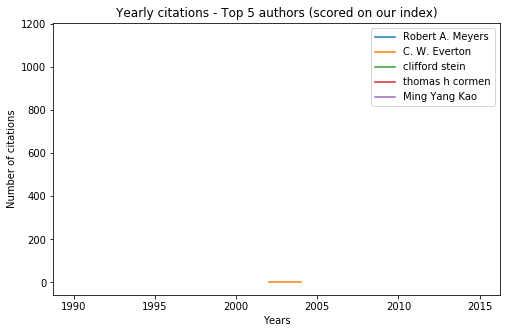

In [120]:
plt.figure(figsize=(8,5))
for author in top_n_our_index:
    year_wise = year_wise_citations(author)
    years = [x[0] for x in year_wise]
    citations = [x[1] for x in year_wise]
    plt.plot(years, citations)
    plt.xticks = np.arange(1985.0, 2018.0, step = 1.0)
plt.legend(top_n_our_index)
plt.xlabel('Years')
plt.ylabel('Number of citations')
plt.title('Yearly citations - Top 5 authors (scored on our index)')
plt.show()

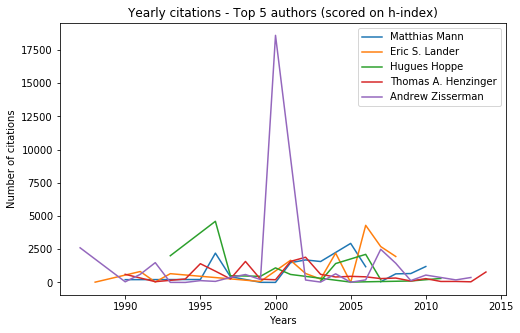

In [103]:
plt.figure(figsize=(8,5))
for author in top_n_h_index:
    year_wise = year_wise_citations(author)
    years = [x[0] for x in year_wise]
    citations = [x[1] for x in year_wise]
    plt.plot(years, citations)
    plt.xticks = np.arange(1985.0, 2018.0, step = 1.0)
plt.legend(top_n_h_index)
plt.xlabel('Years')
plt.ylabel('Number of citations')
plt.title('Yearly citations - Top 5 authors (scored on h-index)')
plt.show()

In [51]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

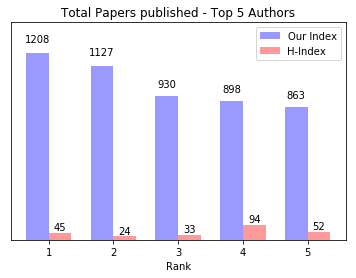

In [104]:
n_groups = 5

top_our_index = [len(author_map[author].paper_list) for author in top_n_our_index]
# std_men = (2, 3, 4, 1, 2)

top_h_index = [len(author_map[author].paper_list) for author in top_n_h_index]
# std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, top_our_index, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Our Index')

rects2 = ax.bar(index + bar_width, top_h_index, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='H-Index')

ax.set_xlabel('Rank')
# ax.set_ylabel('Papers published')
ax.set_title('Total Papers published - Top 5 Authors')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(range(1,6))
ax.set_yticks([])
ax.set_ylim(0, max(top_our_index) + 200)
ax.legend()
autolabel(rects1)
autolabel(rects2)
# fig.tight_layout()
plt.show()

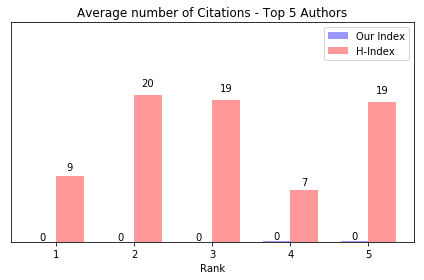

In [105]:
n_groups = 5

top_our_index = [np.average(author_map[author].citations) for author in top_n_our_index]
# std_men = (2, 3, 4, 1, 2)

top_h_index = [np.average(author_map[author].citations) for author in top_n_h_index]
# std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, top_our_index, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Our Index')

rects2 = ax.bar(index + bar_width, top_h_index, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='H-Index')

ax.set_xlabel('Rank')
# ax.set_ylabel('Average Citations')
ax.set_title('Average number of Citations - Top 5 Authors')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(range(1,6))
ax.set_yticks([])
ax.set_ylim(0, max(top_h_index) + 10)
ax.legend()

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

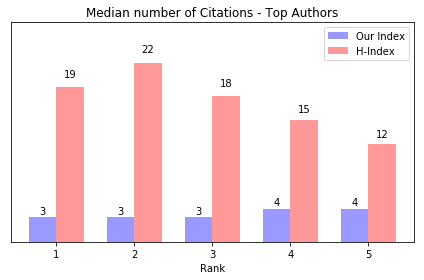

In [66]:
n_groups = 5

top_our_index = [np.median(author_map[author].citations) for author in top_n_our_index]
# std_men = (2, 3, 4, 1, 2)

top_h_index = [np.median(author_map[author].citations) for author in top_n_h_index]
# std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, top_our_index, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Our Index')

rects2 = ax.bar(index + bar_width, top_h_index, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='H-Index')

ax.set_xlabel('Rank')
# ax.set_ylabel('Median Citations')
ax.set_title('Median number of Citations - Top Authors')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(range(1,6))
ax.set_yticks([])
ax.set_ylim(0, max(top_h_index) + 5)
ax.legend()

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [33]:
[author_names_h.index(author) for author in top_n_our_index]

[553, 691, 971, 215, 142]

In [34]:
[author_names.index(author) for author in top_n_h_index]

[76, 108, 101, 99, 44]

In [167]:
common_authors = list(set(author_names[:100]) & set(author_names_h[:100]))

In [168]:
[author_names.index(author) for author in common_authors]

[]

In [169]:
[author_names_h.index(author) for author in common_authors]

[]

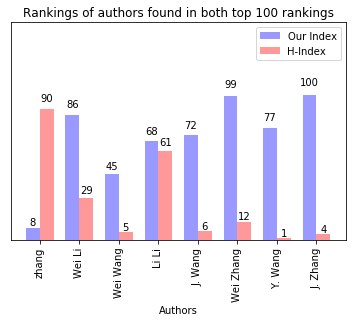

In [76]:
top_our_index = [author_names.index(author) + 1 for author in common_authors]
# std_men = (2, 3, 4, 1, 2)

top_h_index = [author_names_h.index(author) + 1 for author in common_authors]
# std_women = (3, 5, 2, 3, 3)

n_groups = len(top_our_index)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}
# plt.figure(figsize=(18,15))
fig.size = (18,15)
rects1 = ax.bar(index, top_our_index, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Our Index')

rects2 = ax.bar(index + bar_width, top_h_index, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='H-Index')

ax.set_xlabel('Authors')
# ax.set_ylabel('Ranking')
ax.set_title('Rankings of authors found in both top 100 rankings')
ax.set_xticks(index + bar_width / 2)
ax.set_yticks([])
ax.set_xticklabels(common_authors, rotation = 90)
ax.set_yticks([])
ax.set_ylim(0, 150)
ax.legend()

autolabel(rects1)
autolabel(rects2)
# fig.tight_layout()
plt.show()

In [85]:
def author_keywords(auth):
    keywords = []
    for paper in author_map[author].paper_list:
        keywords += citation_graph[paper].keywords
    return set(keywords)
        

In [90]:
len(author_keywords('Li Li'))

3856

In [ ]:
# plots

# 1. top n authors' citations distribution 
# 2. top n authors' no. of papers distribution
# 3. missing values graph
# 4. top n authors' h-index and our index comparison
# 5. top n authors' reverse comparison
# 
# citations distribution
# 


# score
# 1. use a constant rate of decay using publish date
# 2. people with a lot of citations need to be accounted for
# 3. young authors with lesser research time need to be weighted equally 
# 4. median citations for author instead of average
# 5. journal impact factor
# 6. domain of other fields
